In [5]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 42.4 MB/s  0:00:01m0:00:0100:01


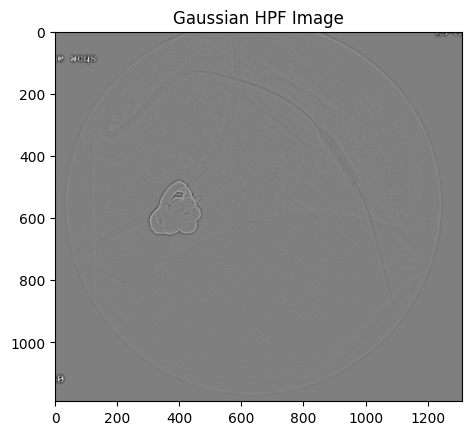

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("dcm2_ori_blur.bmp", cv2.IMREAD_GRAYSCALE)
# img = cv2.imread("dcm2_ori.bmp", cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Could not read image file.")
    exit()

# 가우시안 블러를 적용하여 저주파 성분 추출 (Low Pass Filter 효과)
# (커널 크기는 홀수여야 합니다. 예: (21, 21))
blurred_img = cv2.GaussianBlur(img, (21, 21), 0)

# 원본 이미지에서 블러 이미지를 빼서 고주파 성분만 추출
# 결과값의 범위를 조정하기 위해 127을 더해 회색조로 표현하기도 합니다.
g_hpf_img = img - blurred_img + 127 #

# 결과 시각화 및 저장 (위의 코드 참고)
plt.imshow(g_hpf_img, cmap='gray')
plt.title('Gaussian HPF Image')
plt.show()

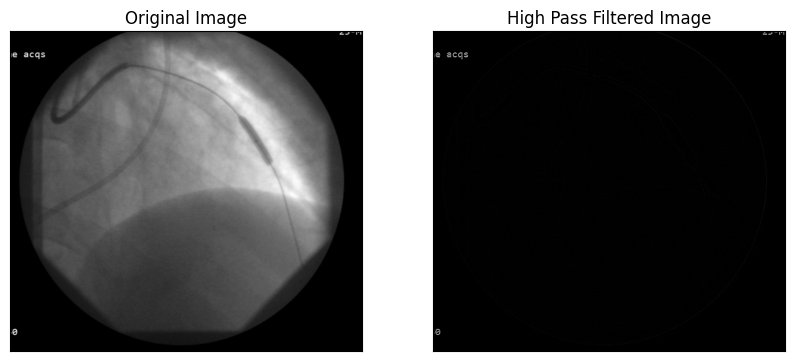

True

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 1. BMP 이미지 불러오기
# "input_image.bmp" 경로를 실제 이미지 파일 경로로 변경하세요.  C:\Users\PACS 교육용 서버\Desktop\lab
# img = cv2.imread("dcm2_ori_blur.bmp", cv2.IMREAD_GRAYSCALE)
img = cv2.imread("dcm2_ori.bmp", cv2.IMREAD_GRAYSCALE)

# 이미지가 정상적으로 로드되었는지 확인
if img is None:
    print("Error: Could not read image file.")
    exit()

# 2. 고주파 통과 필터 커널 정의 (예시: 3x3 샤프닝 커널)
# 커널 요소의 합은 0이 되어야 합니다.
kernel_hpf = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

# 또는 다른 일반적인 커널:
# kernel_laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])

# 3. cv2.filter2D() 함수를 사용하여 필터 적용
# -1은 결과 이미지의 깊이(depth)를 원본 이미지와 동일하게 설정함을 의미합니다.
hpf_img = cv2.filter2D(img, -1, kernel_hpf)

# 4. 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(hpf_img, cmap='gray'), plt.title('High Pass Filtered Image')
plt.xticks([]), plt.yticks([])
plt.show()

# 결과 이미지 저장 (선택 사항)
cv2.imwrite("output_hpf_image.bmp", hpf_img)